In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 68kB/s 
     |████████████████████████████████| 3.8MB 27.4MB/s 
     |████████████████████████████████| 450kB 49.9MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
2.0.0


In [0]:
# Additional imports
from tensorflow.keras.layers import Input,Dense,Flatten,SimpleRNN,GRU,LSTM,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
### build the dataset
# this is a nonlinear and long-distance dataset
# (actually, we will test long-distance vs short-istance patterns)

# start with a small T and increase it later
# T = 10
T = 20
# T = 30
D = 1
X = []
Y = []

def get_label(x, i1,i2,i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(Y)

In [4]:
# Try a linear model first - note: its a classification problem now
i = Input(shape=(T,))
x = Dense(1,activation='sigmoid')(i)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    optimize=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the model
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 407us/sample - loss: 0.8345 - accuracy: 0.5076 - val_loss: 0.8372 - val_accuracy: 0.4956
Epoch 2/100
2500/2500 [==============================] - 0s 100us/sample - loss: 0.8014 - accuracy: 0.5044 - val_loss: 0.8059 - val_accuracy: 0.4944
Epoch 3/100
2500/2500 [==============================] - 0s 100us/sample - loss: 0.7755 - accuracy: 0.5056 - val_loss: 0.7804 - val_accuracy: 0.4980
Epoch 4/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.7529 - accuracy: 0.5072 - val_loss: 0.7585 - val_accuracy: 0.5028
Epoch 5/100
2500/2500 [==============================] - 0s 100us/sample - loss: 0.7351 - accuracy: 0.5104 - val_loss: 0.7420 - val_accuracy: 0.5044
Epoch 6/100
2500/2500 [==============================] - 0s 100us/sample - loss: 0.7217 - accuracy: 0.5148 - val_loss: 0.7294 - val_accuracy: 0.5000
Epoch 7/100
2500/2500 [==============================] - 0

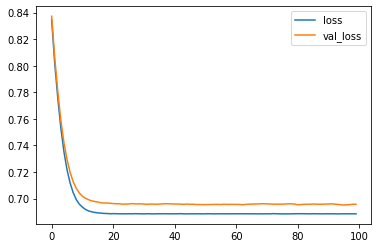

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

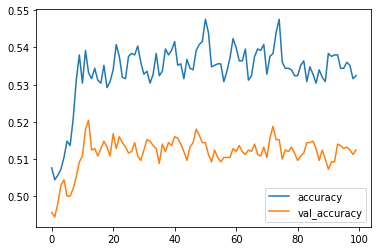

In [6]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [7]:
### Now Try a simple RNN
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

# method1
x = SimpleRNN(10)(i)
# x = LSTM(5)(i)
# x = GRU(5)(i)

# method2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    # optimizer='rmsdrop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1,momentum=0.9),
    metrics=['accuracy'],
)

# train the model
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 843us/sample - loss: 0.7011 - accuracy: 0.4860 - val_loss: 0.6974 - val_accuracy: 0.4940
Epoch 2/200
2500/2500 [==============================] - 1s 334us/sample - loss: 0.6946 - accuracy: 0.4936 - val_loss: 0.6958 - val_accuracy: 0.5028
Epoch 3/200
2500/2500 [==============================] - 1s 333us/sample - loss: 0.6943 - accuracy: 0.5052 - val_loss: 0.6954 - val_accuracy: 0.5032
Epoch 4/200
2500/2500 [==============================] - 1s 341us/sample - loss: 0.6934 - accuracy: 0.5152 - val_loss: 0.6967 - val_accuracy: 0.4940
Epoch 5/200
2500/2500 [==============================] - 1s 329us/sample - loss: 0.6938 - accuracy: 0.5244 - val_loss: 0.6961 - val_accuracy: 0.4976
Epoch 6/200
2500/2500 [==============================] - 1s 336us/sample - loss: 0.6930 - accuracy: 0.5184 - val_loss: 0.6964 - val_accuracy: 0.4912
Epoch 7/200
2500/2500 [==============================] - 1

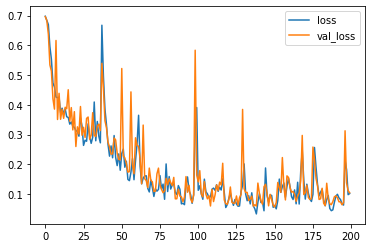

In [0]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

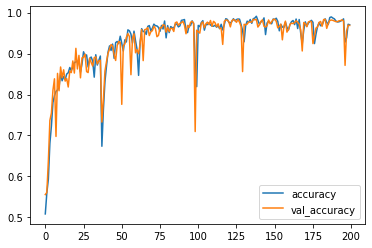

In [0]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [0]:
### Now test our LSTM
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

# method1
# x = SimpleRNN(10)(i)
x = LSTM(5)(i)
# x = GRU(5)(i)

# method2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    # optimizer='rmsdrop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1,momentum=0.9),
    metrics=['accuracy'],
)

# train the model
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6946 - accuracy: 0.4888 - val_loss: 0.6937 - val_accuracy: 0.4864
Epoch 2/400
2500/2500 [==============================] - 1s 353us/sample - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.5080
Epoch 3/400
2500/2500 [==============================] - 1s 373us/sample - loss: 0.6936 - accuracy: 0.5044 - val_loss: 0.6943 - val_accuracy: 0.5036
Epoch 4/400
2500/2500 [==============================] - 1s 370us/sample - loss: 0.6926 - accuracy: 0.5220 - val_loss: 0.6955 - val_accuracy: 0.5036
Epoch 5/400
2500/2500 [==============================] - 1s 346us/sample - loss: 0.6921 - accuracy: 0.5196 - val_loss: 0.6947 - val_accuracy: 0.5024
Epoch 6/400
2500/2500 [==============================] - 1s 369us/sample - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6974 - val_accuracy: 0.5028
Epoch 7/400
2500/2500 [==============================] - 1s 

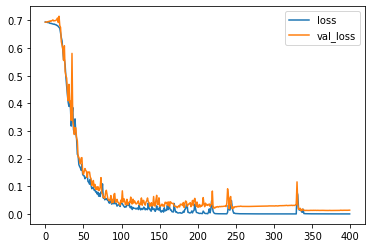

In [0]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

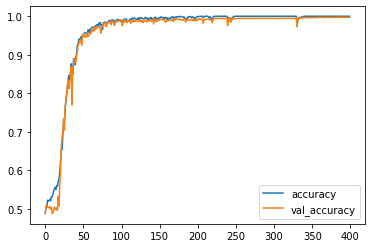

In [0]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [10]:
### Now try LSTM with Global Max pooling
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

# method2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss="binary_crossentropy",
    # optimizer='rmsdrop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1,momentum=0.9),
    metrics=['accuracy'],
)

# train the model
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6937 - accuracy: 0.5100 - val_loss: 0.6930 - val_accuracy: 0.4976
Epoch 2/100
2500/2500 [==============================] - 1s 440us/sample - loss: 0.6930 - accuracy: 0.5164 - val_loss: 0.6924 - val_accuracy: 0.5232
Epoch 3/100
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6911 - accuracy: 0.5148 - val_loss: 0.6918 - val_accuracy: 0.5060
Epoch 4/100
2500/2500 [==============================] - 1s 440us/sample - loss: 0.6891 - accuracy: 0.5288 - val_loss: 0.6911 - val_accuracy: 0.5456
Epoch 5/100
2500/2500 [==============================] - 1s 443us/sample - loss: 0.6828 - accuracy: 0.5820 - val_loss: 0.6893 - val_accuracy: 0.5628
Epoch 6/100
2500/2500 [==============================] - 1s 445us/sample - loss: 0.6801 - accuracy: 0.5828 - val_loss: 0.6771 - val_accuracy: 0.5940
Epoch 7/100
2500/2500 [==============================] - 1s 

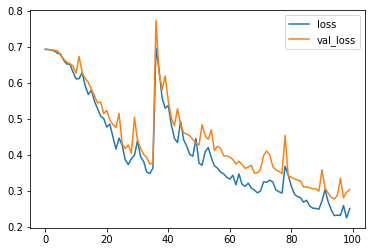

In [11]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

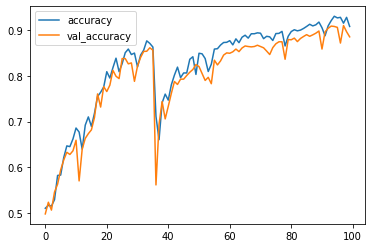

In [12]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()